# INTRODUCTION
<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

## Read Data

In [8]:
# We are reading our data
df = pd.read_csv('cleveland.csv', header = None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [9]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

## Data Exploration

In [10]:
df.target.value_counts()

0    164
1    139
Name: target, dtype: int64

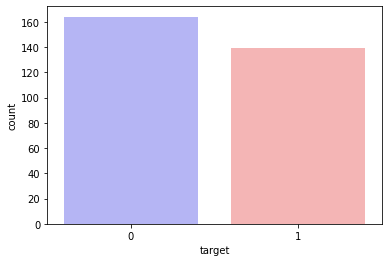

In [11]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [13]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Without Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients With Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Without Heart Disease: 54.13%
Percentage of Patients With Heart Disease: 45.87%


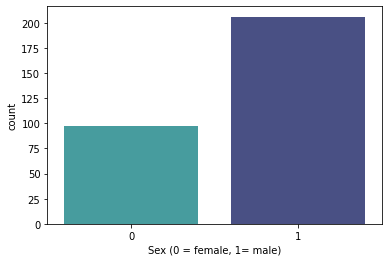

In [14]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [15]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 32.01%
Percentage of Male Patients: 67.99%


In [16]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.273292,3.797546
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.137681,5.840580


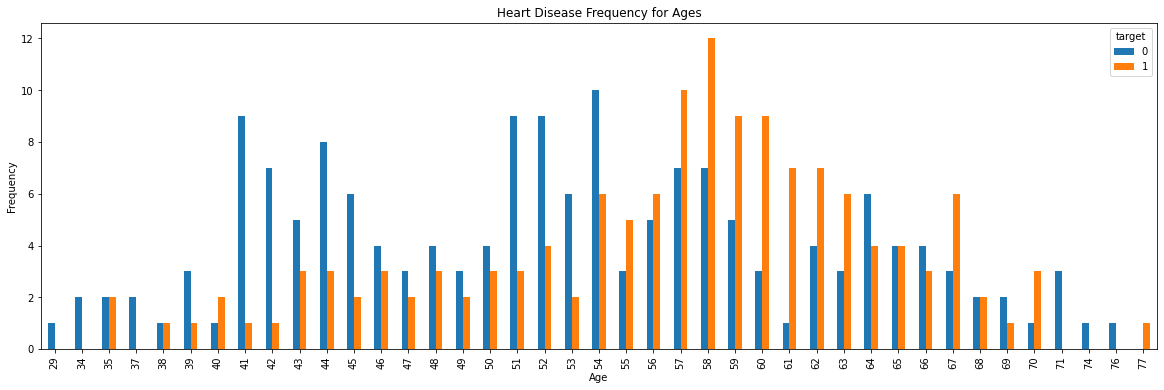

In [17]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

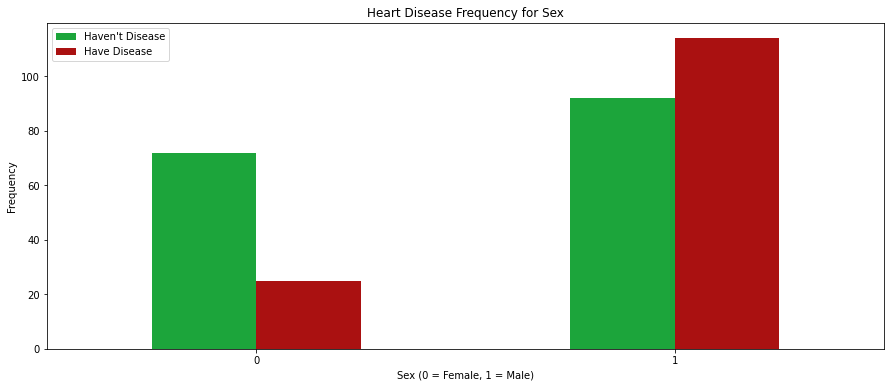

In [18]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

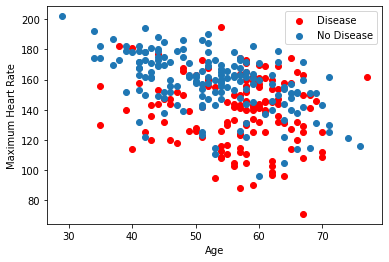

In [19]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

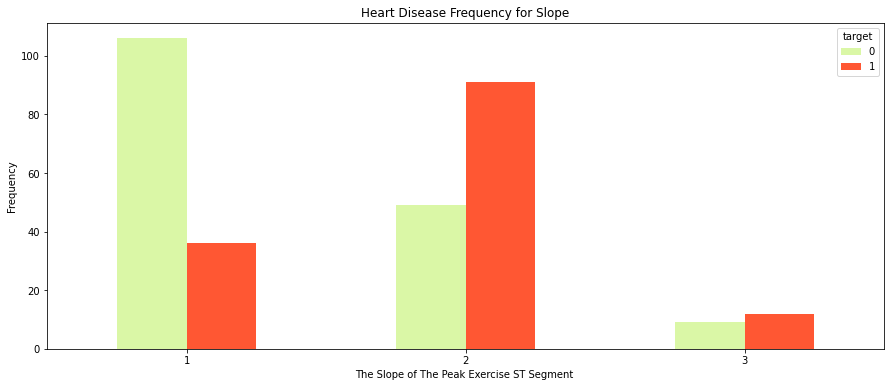

In [20]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

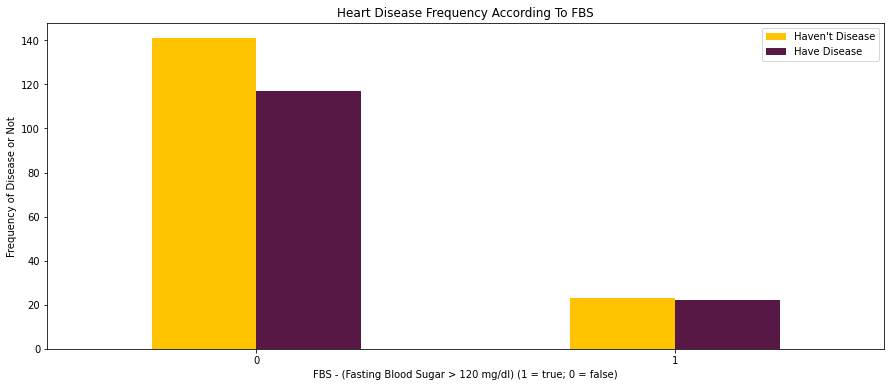

In [21]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

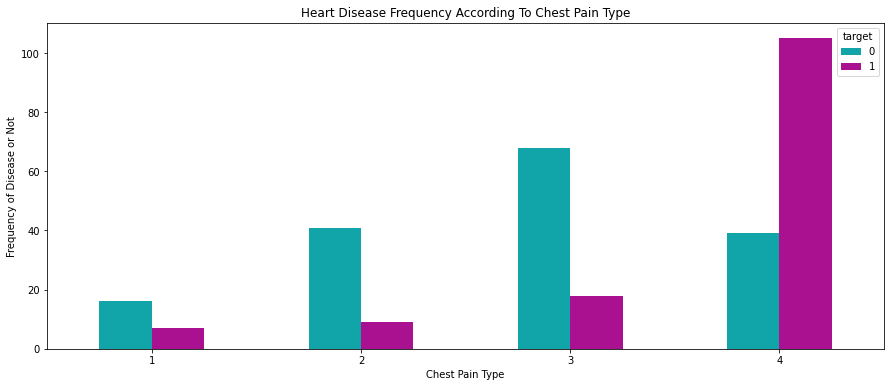

In [23]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables

![](http://)Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [24]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [25]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,cp_4,thal_3.0,thal_6.0,thal_7.0,slope_1,slope_2,slope_3
0,63,1,1,145,233,1,2,150,0,2.3,...,1,0,0,0,0,1,0,0,0,1
1,67,1,4,160,286,0,2,108,1,1.5,...,0,0,0,1,1,0,0,0,1,0
2,67,1,4,120,229,0,2,129,1,2.6,...,0,0,0,1,0,0,1,0,1,0
3,37,1,3,130,250,0,0,187,0,3.5,...,0,0,1,0,1,0,0,0,0,1
4,41,0,2,130,204,0,2,172,0,1.4,...,0,1,0,0,1,0,0,1,0,0


In [26]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,cp_4,thal_3.0,thal_6.0,thal_7.0,slope_1,slope_2,slope_3
0,63,1,145,233,1,2,150,0,2.3,0.0,...,1,0,0,0,0,1,0,0,0,1
1,67,1,160,286,0,2,108,1,1.5,3.0,...,0,0,0,1,1,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2.0,...,0,0,0,1,0,0,1,0,1,0
3,37,1,130,250,0,0,187,0,3.5,0.0,...,0,0,1,0,1,0,0,0,0,1
4,41,0,130,204,0,2,172,0,1.4,0.0,...,0,1,0,0,1,0,0,1,0,0


In [41]:
df.dropna()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,cp_4,thal_3.0,thal_6.0,thal_7.0,slope_1,slope_2,slope_3
0,63,1,145,233,1,2,150,0,2.3,0.0,...,1,0,0,0,0,1,0,0,0,1
1,67,1,160,286,0,2,108,1,1.5,3.0,...,0,0,0,1,1,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2.0,...,0,0,0,1,0,0,1,0,1,0
3,37,1,130,250,0,0,187,0,3.5,0.0,...,0,0,1,0,1,0,0,0,0,1
4,41,0,130,204,0,2,172,0,1.4,0.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,0,123,1,0.2,0.0,...,0,0,0,1,0,0,1,0,1,0
298,45,1,110,264,0,0,132,0,1.2,0.0,...,1,0,0,0,0,0,1,0,1,0
299,68,1,144,193,1,0,141,0,3.4,2.0,...,0,0,0,1,0,0,1,0,1,0
300,57,1,130,131,0,0,115,1,1.2,1.0,...,0,0,0,1,0,0,1,0,1,0


In [54]:
df = df.dropna()

## Creating Model for Logistic Regression
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [76]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [77]:
x_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,cp_4,thal_3.0,thal_6.0,thal_7.0,slope_1,slope_2,slope_3
0,63,1,145,233,1,2,150,0,2.3,0.0,1,0,0,0,0,1,0,0,0,1
1,67,1,160,286,0,2,108,1,1.5,3.0,0,0,0,1,1,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2.0,0,0,0,1,0,0,1,0,1,0
3,37,1,130,250,0,0,187,0,3.5,0.0,0,0,1,0,1,0,0,0,0,1
4,41,0,130,204,0,2,172,0,1.4,0.0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,140,241,0,0,123,1,0.2,0.0,0,0,0,1,0,0,1,0,1,0
298,45,1,110,264,0,0,132,0,1.2,0.0,1,0,0,0,0,0,1,0,1,0
299,68,1,144,193,1,0,141,0,3.4,2.0,0,0,0,1,0,0,1,0,1,0
300,57,1,130,131,0,0,115,1,1.2,1.0,0,0,0,1,0,0,1,0,1,0


In [57]:
# Normalize
# x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0)

In [79]:
x_test

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,cp_4,thal_3.0,thal_6.0,thal_7.0,slope_1,slope_2,slope_3
208,55,1,130,262,0,0,155,0,0.0,0.0,0,1,0,0,1,0,0,1,0,0
189,69,1,140,254,0,2,146,0,2.0,3.0,0,0,1,0,0,0,1,0,1,0
12,56,1,130,256,1,2,142,1,0.6,1.0,0,0,1,0,0,1,0,0,1,0
221,54,0,108,267,0,2,167,0,0.0,0.0,0,0,1,0,1,0,0,1,0,0
239,42,1,120,295,0,0,162,0,0.0,0.0,0,1,0,0,1,0,0,1,0,0
136,70,1,145,174,0,0,125,1,2.6,0.0,0,0,0,1,0,0,1,0,0,1
230,52,0,136,196,0,2,169,0,0.1,0.0,0,0,1,0,1,0,0,0,1,0
207,50,1,144,200,0,2,126,1,0.9,0.0,0,0,0,1,0,0,1,0,1,0
52,44,1,112,290,0,2,153,0,0.0,1.0,0,0,0,1,1,0,0,1,0,0
108,61,1,120,260,0,0,140,1,3.6,1.0,0,0,0,1,0,0,1,0,1,0


### Sklearn Logistic Regression

In [80]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 78.33%


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. ## <font color = "purple">Our model works with <font color="red">**78.33%**</font> accuracy.</font>

## K-Nearest Neighbour (KNN) Classification
<br>
Let's see what will be score if we use KNN algorithm.

In [81]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 56.67%


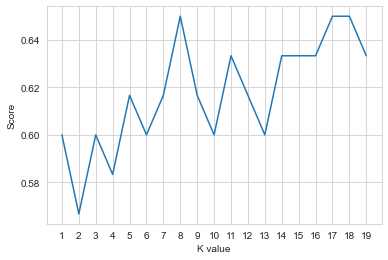

Maximum KNN Score is 65.00%


In [82]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

## <font color="green">KNN Model's Accuracy is <font color="red">65.00%</font></font>

## Support Vector Machine (SVM) Algorithm 
Now we will use SVM algorithm. 

In [83]:
from sklearn.svm import SVC

In [84]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 63.33%


## <font color="orange">Test Accuracy of SVM Algorithm is <font color="red"> 63.33%</font></font>

## Naive Bayes Algorithm

In [88]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 83.33%


## <font color="magenta">Accuracy of Naive Bayes: <font color="red">83.33%</font></font>

## Decision Tree Algorithm

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 80.00%


## <font color="#CFC60E">Test Accuracy of Decision Tree Algorithm: <font color="red">80.00%</font></font>

## Random Forest Classification

In [92]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 300, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 78.33%


## <font color="#0FBBAE">Test Accuracy of Random Forest: <font color="red">78.33%</font></font>

## Comparing Models

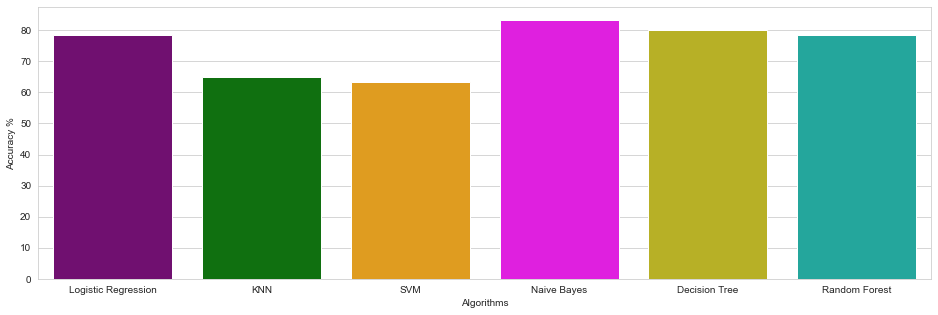

In [93]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [94]:
# Predicted values
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)

In [95]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


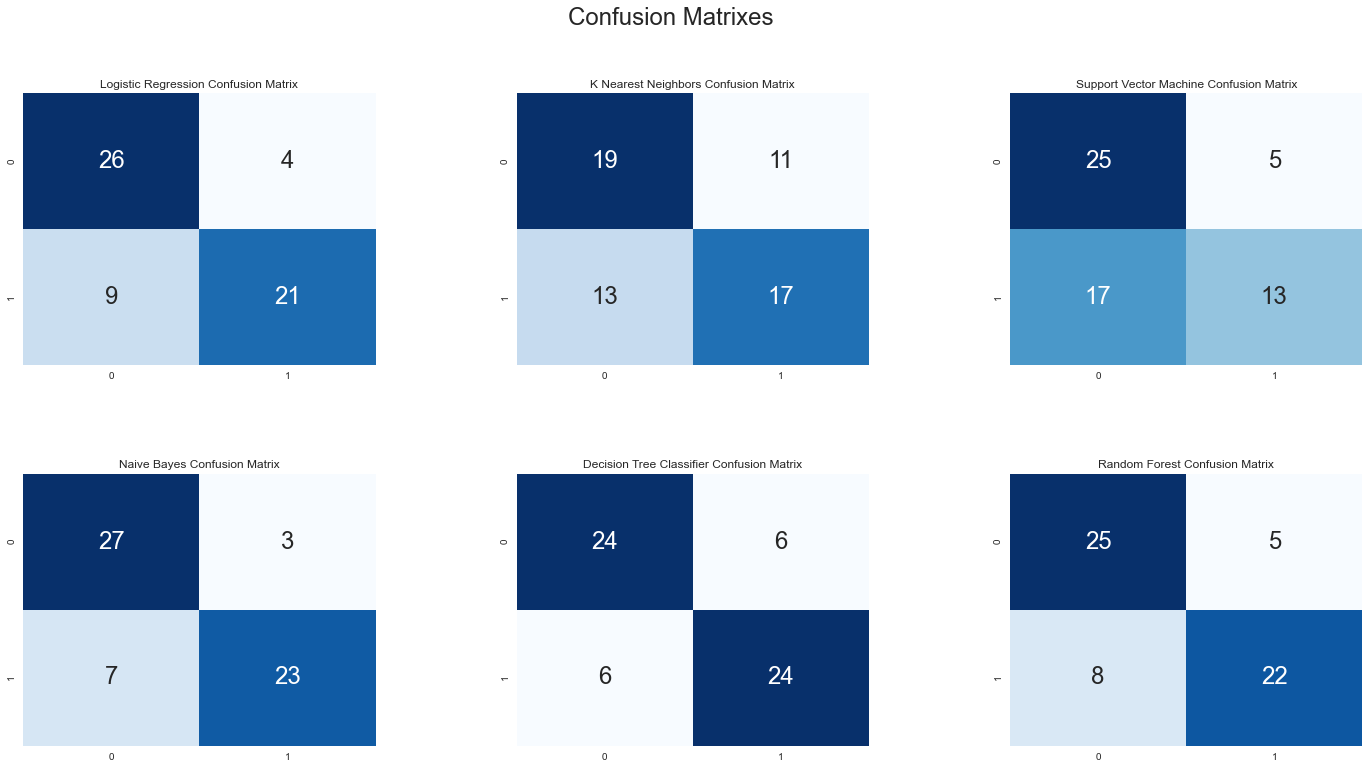

In [96]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [97]:
#saving the best model
#naive bayes model
import pickle

pickle.dump(nb, open('naive_bayes_model.pkl', 'wb'))

In [99]:
# x_train